### LangGraph (mini-graf stanów)


In [24]:
!pip install -q langgraph langchain python-dotenv
!apt install libgraphviz-dev
!pip install pygraphviz


In [25]:
from typing import TypedDict
from langgraph.graph import StateGraph, END

### Definicja stanu

In [26]:
class State(TypedDict):
    x: int

### Definicja węzłów

In [27]:
def add_one(state: State) -> State:
    return {"x": state["x"] + 1}

def multiply_by_two(state: State) -> State:
    return {"x": state["x"] * 2}

def minus_five(state: State) -> State:
    return {"x": state["x"] - 5}

def finish(state: State) -> State:
    print(f"Wynik końcowy {state['x']}")
    return state

### Budowa grafu

In [28]:
graph = StateGraph(State)

#definiujemy węzły
graph.add_node("A", add_one)
graph.add_node("B", multiply_by_two)
graph.add_node("C", minus_five)
graph.add_node("D", finish)

#definiujemy połączenia
graph.set_entry_point("A")
graph.add_edge("A", "B")
graph.add_edge("B", "C")
graph.add_edge("C", "D")
graph.add_edge("D", END)


### Kompilacja i uruchomienie

In [29]:
#kompilacja grafu
app = graph.compile()

result = app.invoke({"x": 2})
print(result)


Wynik końcowy 1
{'x': 1}


### Wizualizacja grafu

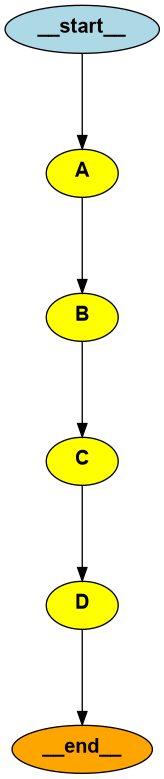

In [30]:
# Rysujemy schemat
from IPython.display import Image, display

png_bytes = app.get_graph().draw_png()
display(Image(png_bytes))
